# Assignment 2: Due Tuesday 9/17

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function 

In [191]:
import numpy as np
import math
%matplotlib inline

#define projectile motion function in vacuum
v0 = 300
theta = 50*np.pi/180
g = 9.81
p = 7.8
d = 0.15
v = (4/3)*np.pi*((d/2)**3)
m = p*v
c = 0

vx = v0*math.cos(theta) # x component of velocity
vy = v0*math.sin(theta) # y component of velocity

def proj_vac(t,Y):
    x, y, vx, vy = Y
    
    dx_dt = vx
    dy_dt = vy
    dvx_dt = 0
    dvy_dt = -g
    
    return np.array([dx_dt, dy_dt, dvx_dt, dvy_dt])


Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [231]:
#code
from scipy import integrate

x0 = 0
y0 = 0
initial = [x0, y0, vx, vy]

t0 = 0
tf = 50
n = 1000
t = np.linspace(t0,tf,n)
sol_RK45 = integrate.solve_ivp(proj_vac, (t0,tf), initial, method='RK45', t_eval=t)

X_sol = sol_RK45.y[0]
Y_sol = sol_RK45.y[1]

print(X_sol, Y_sol)

[   0.            9.65146561   19.30293122   28.95439683   38.60586244
   48.25732805   57.90879367   67.56025928   77.21172489   86.8631905
   96.51465611  106.16612172  115.81758733  125.46905294  135.12051855
  144.77198416  154.42344977  164.07491539  173.726381    183.37784661
  193.02931222  202.68077783  212.33224344  221.98370905  231.63517466
  241.28664027  250.93810588  260.58957149  270.24103711  279.89250272
  289.54396833  299.19543394  308.84689955  318.49836516  328.14983077
  337.80129638  347.45276199  357.1042276   366.75569321  376.40715883
  386.05862444  395.71009005  405.36155566  415.01302127  424.66448688
  434.31595249  443.9674181   453.61888371  463.27034932  472.92181493
  482.57328055  492.22474616  501.87621177  511.52767738  521.17914299
  530.8306086   540.48207421  550.13353982  559.78500543  569.43647104
  579.08793665  588.73940227  598.39086788  608.04233349  617.6937991
  627.34526471  636.99673032  646.64819593  656.29966154  665.95112715
  675.60

Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

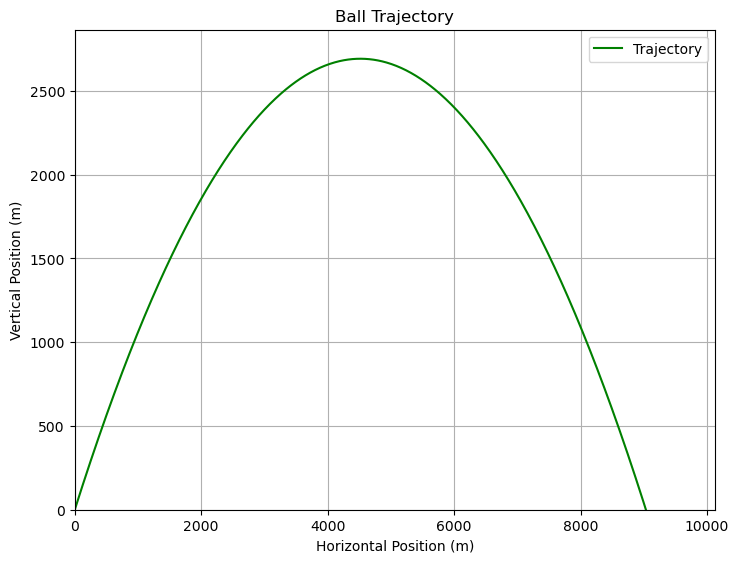

(9033.771811810837, 46.84684684684685)

In [234]:
#codes
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot([1,1,1,1])
ax.plot(X_sol, Y_sol, 'g', label = 'Trajectory')
ax.legend(loc = 'best')
ax.set_xlabel('Horizontal Position (m)')
ax.set_ylabel('Vertical Position (m)')
plt.xlim(left=0)
plt.ylim(bottom=0)
ax.grid()
plt.title('Ball Trajectory')
plt.show()

ground = np.where(Y_sol >= 0)[0][-1]
ground_time = sol_RK45.t[ground]
horizontal_range = X_sol[ground]

(horizontal_range, ground_time)

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [237]:
#codes
def rangekutta_4(f,t,x0, args=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = initial
    for i in range (0,n-1):  
        dt = t[i+1] - t[i]
        k1 = np.array(f(t[i], x[i], *args))
        k2 = np.array(f(t[i] + dt / 2.0, x[i] + dt / 2.0 * k1, *args))
        k3 = np.array(f(t[i] + dt / 2.0, x[i] + dt / 2.0 * k2, *args))
        k4 = np.array(f(t[i] + dt, x[i] + dt * k3, *args))

        x[i+1] = x[i] + (dt/6.0) * (k1+2*k2+2*k3+k4)

    return x

sol_rk4 = rangekutta_4(proj_vac,t,initial)
X_sol_rk4 = sol_rk4[:, 0]
Y_sol_rk4 = sol_rk4[:, 1]

print(X_sol_rk4,Y_sol_rk4)

[   0.            9.65146561   19.30293122   28.95439683   38.60586244
   48.25732805   57.90879367   67.56025928   77.21172489   86.8631905
   96.51465611  106.16612172  115.81758733  125.46905294  135.12051855
  144.77198416  154.42344977  164.07491539  173.726381    183.37784661
  193.02931222  202.68077783  212.33224344  221.98370905  231.63517466
  241.28664027  250.93810588  260.58957149  270.24103711  279.89250272
  289.54396833  299.19543394  308.84689955  318.49836516  328.14983077
  337.80129638  347.45276199  357.1042276   366.75569321  376.40715883
  386.05862444  395.71009005  405.36155566  415.01302127  424.66448688
  434.31595249  443.9674181   453.61888371  463.27034932  472.92181493
  482.57328055  492.22474616  501.87621177  511.52767738  521.17914299
  530.8306086   540.48207421  550.13353982  559.78500543  569.43647104
  579.08793665  588.73940227  598.39086788  608.04233349  617.6937991
  627.34526471  636.99673032  646.64819593  656.29966154  665.95112715
  675.60

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function

In [326]:
v0 = 300
theta = 50*np.pi/180
g = 9.81
p = 7.8
V = (4/3)*np.pi*((7.5)**3)
m = p*V
d = 0.15
gamma = 100
c = gamma*(d**2)

vx = v0*math.cos(theta)
vy = v0*math.sin(theta)

def proj_res(t, Y):
    x, y, vx, vy = Y
    v = np.sqrt(vx**2 + vy**2)
    dx_dt = vx
    dy_dt = vy
    dvx_dt = -(c/m) * v * vx
    dvy_dt = -g - (c/m) * v * vy
    return [dx_dt, dy_dt, dvx_dt, dvy_dt]


Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [319]:
#codes
initial_conditions = [0, 0, vx, vy]

t0 = 0
tf = 35
n = 1000
t = np.linspace(t0,tf,n)
sol_RK45 = integrate.solve_ivp(proj_res, (t0,tf), initial, method='RK45', t_eval=t)

X_sol = sol_RK45.y[0]
Y_sol = sol_RK45.y[1]

print(X_sol, Y_sol)

[   0.            6.75313062   13.5004806    20.24206492   26.97789846
   33.70799609   40.4323726    47.15104275   53.86402125   60.57132276
   67.27296188   73.96895317   80.65931115   87.34405027   94.02318496
  100.69672958  107.36470041  114.02711313  120.68398167  127.33531994
  133.9811418   140.62146108  147.25629156  153.88564701  160.50954114
  167.12798764  173.74100015  180.34859228  186.95077761  193.54756968
  200.13898199  206.72502801  213.30572116  219.88107485  226.45110244
  233.01581723  239.57523253  246.12936158  252.6782176   259.22181376
  265.76016321  272.29327906  278.82117436  285.34386217  291.86135547
  298.37366724  304.88081038  311.3827978   317.87964236  324.37135685
  330.85795408  337.33944678  343.81584767  350.28716942  356.75342466
  363.214626    369.670786    376.1219172   382.56803208  389.00914311
  395.4452627   401.87640324  408.30257709  414.72379654  421.14007389
  427.55142137  433.95785118  440.3593755   446.75600646  453.14775616
  459.

Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

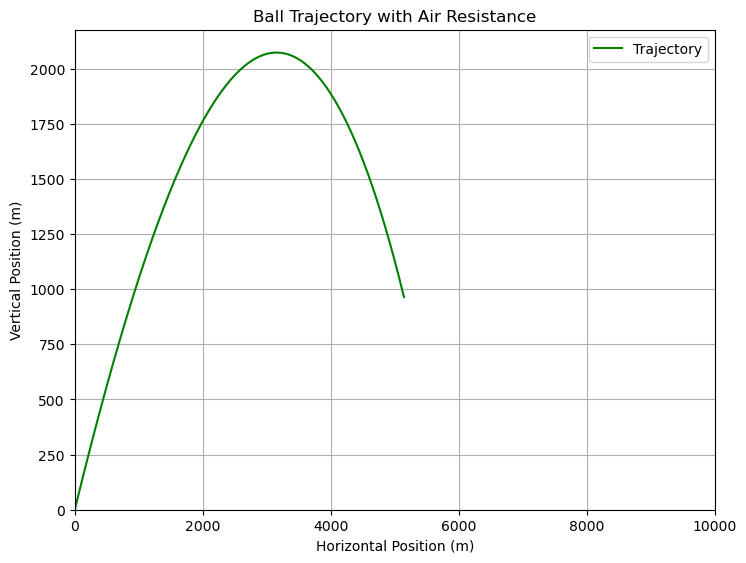

(5143.231435463174, 35.0)

In [324]:
#codes
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot([1,1,1,1])
ax.plot(X_sol, Y_sol, 'g', label = 'Trajectory')
ax.legend(loc = 'best')
ax.set_xlabel('Horizontal Position (m)')
ax.set_ylabel('Vertical Position (m)')
plt.xlim(left=0, right=10000)
plt.ylim(bottom=0)
ax.grid()
plt.title('Ball Trajectory with Air Resistance')
plt.show()

ground = np.where(Y_sol >= 0)[0][-1]
ground_time = sol_RK45.t[ground]
horizontal_range = X_sol[ground]

(horizontal_range, ground_time)

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function

In [ ]:
#code

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [ ]:
#codes

Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

In [6]:
#codes

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

In [7]:
#codes

Your results should look like the plot below.

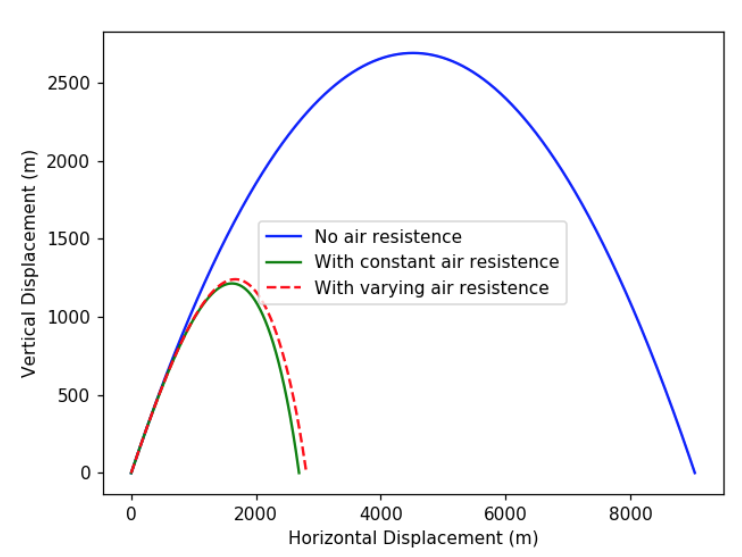

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**